In [52]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [46]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [14]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
# Fill missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


/var/folders/jz/fx5v1b_95530dmxdgmkk1dh40000gn/T/ipykernel_2741/3531534138.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/jz/fx5v1b_95530dmxdgmkk1dh40000gn/T/ipykernel_2741/3531534138.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [36]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

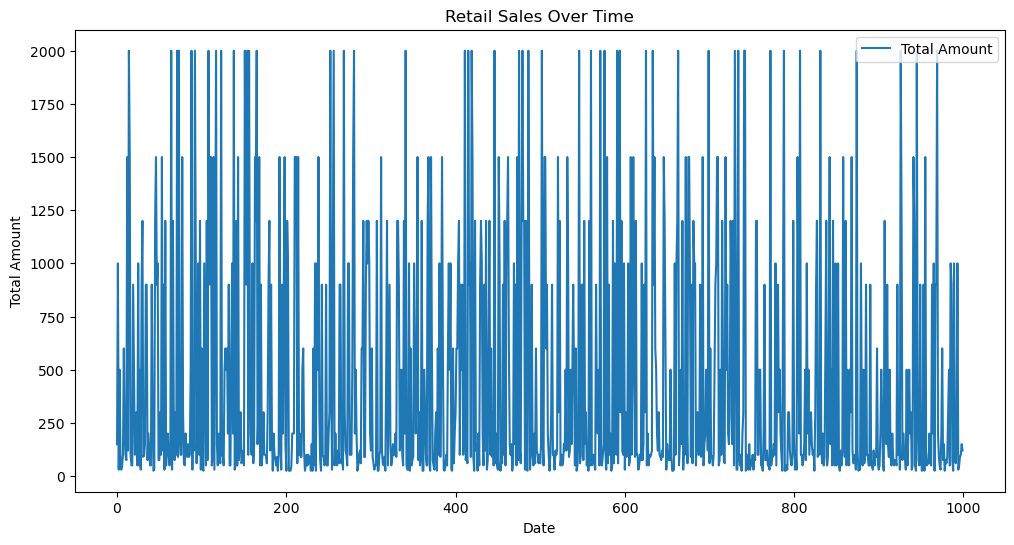

In [38]:
# Plot the time series with 'Total Amount'
plt.figure(figsize=(12, 6))
plt.plot(df['Total Amount'], label='Total Amount')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


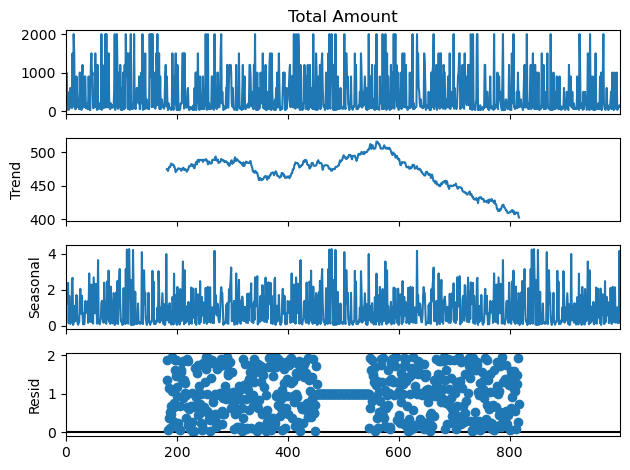

In [74]:
# Decompose the 'Total Amount' time series
decomposition = seasonal_decompose(df['Total Amount'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16180.713, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15895.876, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16178.714, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=15894.034, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=15895.878, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=15897.738, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=15782.854, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=15784.847, Time=0.21 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=15784.847, Time=0.15 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=15786.848, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=15716.209, Time=0.07 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=15717.809, Time=0.26 sec
 ARIMA(3,1,0)(0,0

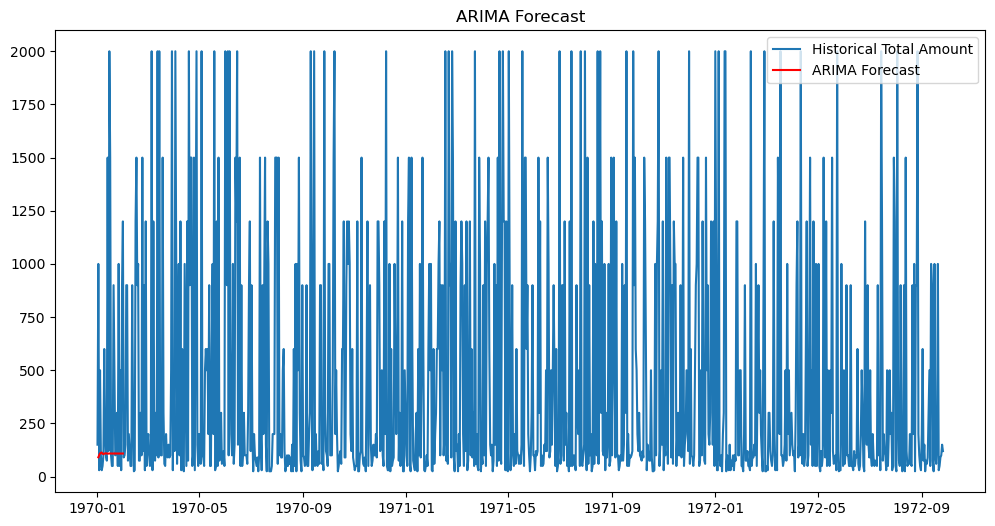

In [42]:
# Automatically determine ARIMA parameters
auto_arima_model = auto_arima(df['Total Amount'], seasonal=True, m=12, stepwise=True, trace=True)

# Fit ARIMA model
arima_model = ARIMA(df['Total Amount'], order=auto_arima_model.order)
arima_fitted = arima_model.fit()

# Forecast the next 30 days
forecast_arima = arima_fitted.forecast(steps=30)

# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Historical Total Amount')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


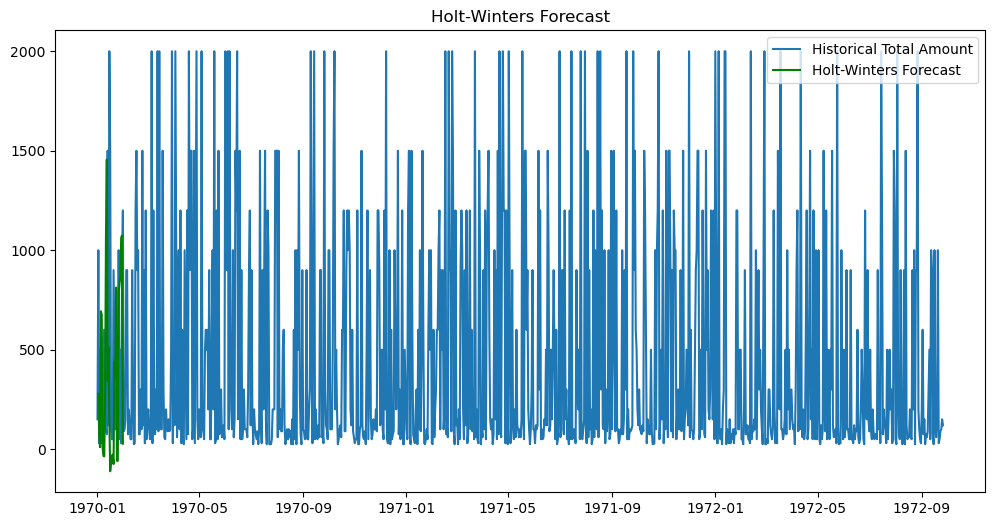

In [68]:
# Fit Holt-Winters model
hw_model = ExponentialSmoothing(df['Total Amount'], trend='add', seasonal='add', seasonal_periods=365).fit()

# Forecast the next 30 days
forecast_hw = hw_model.forecast(steps=30)

# Plot Holt-Winters forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'], label='Historical Total Amount')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast_hw, label='Holt-Winters Forecast', color='green')
plt.legend()
plt.title('Holt-Winters Forecast')
plt.show()


In [54]:
# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA predictions
forecast_arima_train = arima_fitted.predict(start=test.index[0], end=test.index[-1])

# Holt-Winters predictions
forecast_hw_train = hw_model.forecast(steps=len(test))

# ARIMA evaluation
mae_arima = mean_absolute_error(test['Total Amount'], forecast_arima_train)
rmse_arima = np.sqrt(mean_squared_error(test['Total Amount'], forecast_arima_train))
mape_arima = mean_absolute_percentage_error(test['Total Amount'], forecast_arima_train)

# Holt-Winters evaluation
mae_hw = mean_absolute_error(test['Total Amount'], forecast_hw_train)
rmse_hw = np.sqrt(mean_squared_error(test['Total Amount'], forecast_hw_train))
mape_hw = mean_absolute_percentage_error(test['Total Amount'], forecast_hw_train)

# Print evaluation results
print(f"ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2%}")
print(f"Holt-Winters - MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2%}")


ARIMA - MAE: 396.83, RMSE: 521.33, MAPE: 360.10%
Holt-Winters - MAE: 411.81, RMSE: 586.10, MAPE: 344.37%


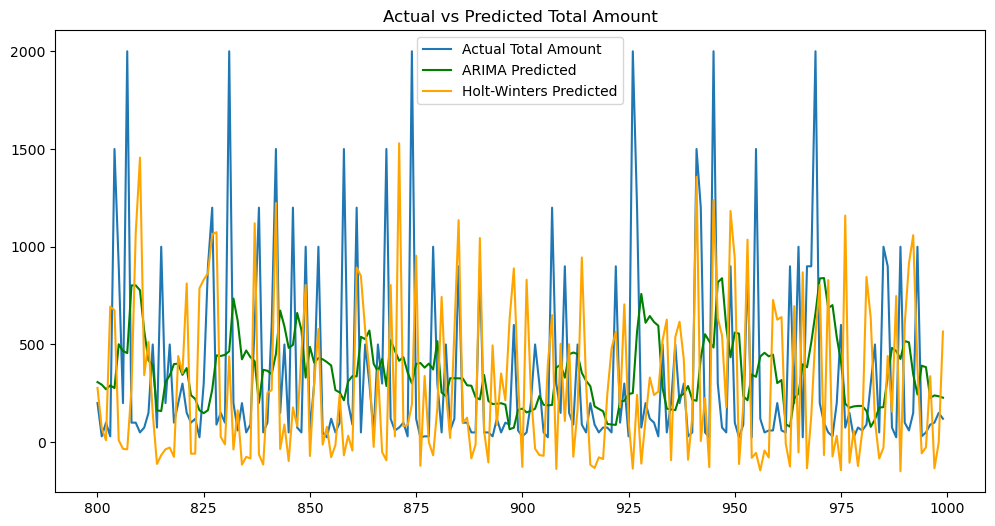

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Total Amount'], label='Actual Total Amount')
plt.plot(test.index, forecast_arima_train, label='ARIMA Predicted', color='green')
plt.plot(test.index, forecast_hw_train, label='Holt-Winters Predicted', color='orange')
plt.legend()
plt.title('Actual vs Predicted Total Amount')
plt.show()